In [112]:
#Get the data, read the modified csv version
import pandas as pd
import numpy as np
dataset = pd.read_csv(r'csv/merge_modified_data.csv')
#dataset.loc[:, 'gender'] = 1
dataset.loc[dataset['gender'] == 'Male', 'gender'] = 0
dataset.loc[dataset['gender'] == 'Female', 'gender'] = 1
dataset.head()

,height(cm),weight(kg),gender,size
0,154.94,64.410117,1,L
1,162.56,54.431084,1,S
2,172.72,66.678078,1,S
3,167.64,79.378665,1,XL
4,160.02,88.450512,1,L


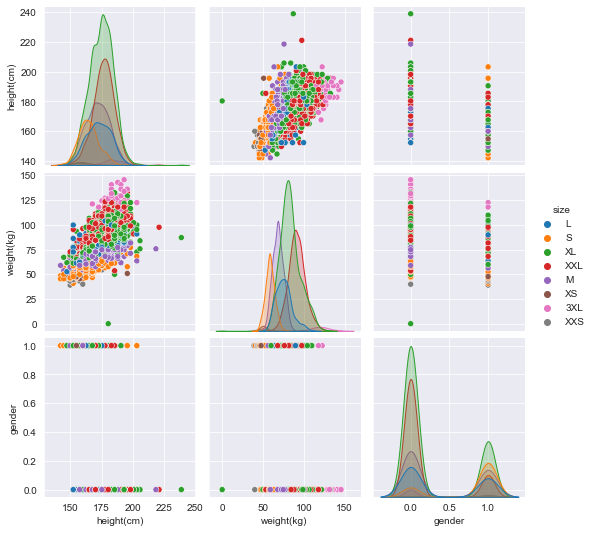

In [113]:
#plotting the data
import seaborn as sns
%matplotlib inline

sns.pairplot(dataset, hue='size')

In [114]:
from sklearn.preprocessing import  StandardScaler
#create a StandardScaler() object called scaler
scaler = StandardScaler()
#fit scaler object to the feature
scaler.fit(dataset.drop('size', axis=1))

StandardScaler()

In [115]:
#use the .transform() method to transform the features to a scaled version
scaled_features = scaler.transform(dataset.drop('size', axis=1))

#Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked

features_df = pd.DataFrame(scaled_features, columns=dataset.columns[:-1])
features_df.head(3)

,height(cm),weight(kg),gender
0,-1.879320,-0.972113,1.433662
1,-1.102448,-1.625141,1.433662
2,-0.066617,-0.823697,1.433662


In [116]:
#import train_test_split to split the data into training set and a testing set.
from sklearn.model_selection import train_test_split
X = features_df.values
y = dataset['size'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.5)

In [117]:
#import KNeighborsClassifier from scikit learn
from  sklearn.neighbors import KNeighborsClassifier

#create KNN model instance with n_neighbor=1
knn = KNeighborsClassifier(n_neighbors=3)

#fits the knn model to train the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [118]:
#prediction and evaluation
#Use the predict method to predict values using KNN model and K_test

pred_model = knn.predict(X_test)

In [119]:
#create a confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred_model))

[[ 16   0   1   0  13   0   4   0]
 [  1  78  72  18 151   0  42   0]
 [  0 120 228  67  96   0   7   0]
 [  0  36  75 158  22   6   1   0]
 [ 15 182  90  11 560   0 253   0]
 [  0   1   2  12   0   2   0   0]
 [ 14  61  12   1 234   0 360   0]
 [  0   0   1   8   0   3   0   0]]


In [120]:
print(classification_report(y_test, pred_model))

              precision    recall  f1-score   support

         3XL       0.35      0.47      0.40        34
           L       0.16      0.22      0.19       362
           M       0.47      0.44      0.46       518
           S       0.57      0.53      0.55       298
          XL       0.52      0.50      0.51      1111
          XS       0.18      0.12      0.14        17
         XXL       0.54      0.53      0.53       682
         XXS       0.00      0.00      0.00        12

    accuracy                           0.46      3034
   macro avg       0.35      0.35      0.35      3034
weighted avg       0.47      0.46      0.47      3034



c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [121]:
#CHOSING A K VALUE range from 1 to 30
#creatin a for loop that trains varius KNN models with different k values, then keep track of the error rate for each of these models with a list

error_rate = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

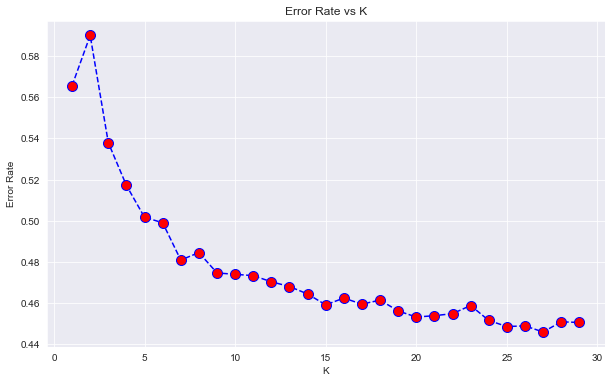

In [122]:
from matplotlib import pyplot as plt

#creating the following plot using the information from the loop

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [123]:
#CHOSING A K VALUE range from 1 to 59
#creatin a for loop that trains varius KNN models with different k values, then keep track of the error rate for each of these models with a list

error_rate = []

for i in range(1, 70):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

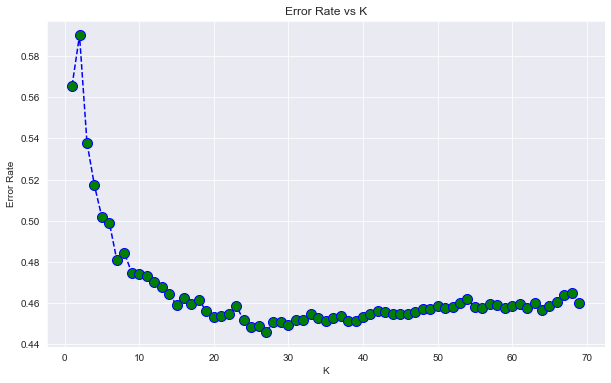

In [124]:
from matplotlib import pyplot as plt

#creating the following plot using the information from the loop

plt.figure(figsize=(10,6))
plt.plot(range(1,70), error_rate, color='blue', linestyle='--', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [125]:
#retraining the model wth the best K Value
#with K = 30

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
pred_model = knn.predict(X_test)
print(confusion_matrix(y_test, pred_model))
print('\n')
print(classification_report(y_test, pred_model))

[[ 12   0   1   0  15   0   6   0]
 [  0  18  98  18 194   0  34   0]
 [  0  35 312  66 102   0   3   0]
 [  0   4  76 196  22   0   0   0]
 [  2  25  80  16 780   0 208   0]
 [  0   0   0  17   0   0   0   0]
 [  4   3   2   0 320   0 353   0]
 [  0   0   0  12   0   0   0   0]]


              precision    recall  f1-score   support

         3XL       0.67      0.35      0.46        34
           L       0.21      0.05      0.08       362
           M       0.55      0.60      0.57       518
           S       0.60      0.66      0.63       298
          XL       0.54      0.70      0.61      1111
          XS       0.00      0.00      0.00        17
         XXL       0.58      0.52      0.55       682
         XXS       0.00      0.00      0.00        12

    accuracy                           0.55      3034
   macro avg       0.39      0.36      0.36      3034
weighted avg       0.52      0.55      0.52      3034



c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [126]:
person = [[180, 90, 0]]
knn.predict(person)

array(['XXL'], dtype=object)

In [127]:
person = [[165, 60, 0]]
knn.predict(person)

array(['XL'], dtype=object)

In [128]:
person = [[165, 57, 1]]
knn.predict(person)

array(['XL'], dtype=object)